In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

#ランダムシードの設定
import random
np.random.seed(2021)
random.seed(2021)

In [3]:
input = Path('input')

df = pd.read_csv(input / 'join_data.csv')
df.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [4]:
feature = ['acousticness','positiveness','danceability',
            'loudness','energy','liveness','speechiness','instrumentalness']

In [5]:
cluster_data = df[feature]
cluster_data.head()

,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
0,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884
1,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910
2,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470
3,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399
4,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030


In [6]:
#欠損値を平均で補完

cluster_data.replace('None',np.nan,inplace=True)

for col in ['acousticness','positiveness','danceability','energy',
            'liveness','speechiness','instrumentalness']:
    cluster_data[col] = cluster_data[col].astype('float64')
    cluster_mean = cluster_data[col].mean()
    cluster_data[col].fillna(cluster_mean,inplace=True)


C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\pandas\core\frame.py:4527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

array([[-0.9553665 , -1.38760331, -1.96517058, ...,  0.61491787,
         2.23479722,  4.33865467],
       [-1.00345594, -0.53671031,  0.32990994, ..., -0.47064954,
        -0.45566487, -0.58851913],
       [ 0.65185471, -0.9015451 , -0.2761086 , ..., -0.32187197,
         1.98705141, -0.31439455],
       ...,
       [-0.52482814,  1.62968881,  1.17696168, ...,  0.32497654,
        -0.89991392, -0.51527933],
       [-0.56880842,  1.1891606 ,  0.49354322, ...,  0.59633364,
        -0.40458945, -0.33789836],
       [ 1.71062049, -0.81912956,  0.05095038, ..., -0.08323971,
        -0.73998822, -0.3645549 ]])

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def clustering(cluster_data,n_cluster):
    sc = StandardScaler()
    cluster_data_sc = sc.fit_transform(cluster_data)
    
    kmeans = KMeans(n_clusters=n_cluster,random_state=2021)
    clusters = kmeans.fit(cluster_data)
    cluster_data['cluster'] = clusters.labels_
    return cluster_data

In [24]:
cluster_df = clustering(cluster_data,6)
cluster_df.head()

C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,cluster
0,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,3
1,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,1
2,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,5
3,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,1
4,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,3


In [8]:
cluster_df.groupby('cluster').mean()

,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness
cluster,,,,,,,,
0,0.166048,0.385074,0.402228,-5.171353,0.754703,0.248037,0.196946,0.182184
1,0.255617,0.705080,0.647470,-6.376067,0.697291,0.239150,0.235815,0.169616
2,0.726691,0.270400,0.398019,-13.342984,0.281764,0.227204,0.170131,0.234594
3,0.297541,0.482600,0.483342,-7.132106,0.690862,0.705438,0.240824,0.177417
4,0.437306,0.426547,0.539035,-8.745622,0.490221,0.217390,0.166939,0.171541
5,0.189439,0.301874,0.359916,-6.625777,0.721795,0.284667,0.206559,0.701372


In [9]:
from sklearn.decomposition import PCA

def pca(origin_data,cluster_df,n_component):
    sc = StandardScaler()
    cluster_sc = sc.fit_transform(origin_data)
    X = cluster_sc
    pca = PCA(n_components=n_component)
    pca.fit(X)
    x_pca = pca.transform(X)
    pca_df = pd.DataFrame(x_pca)
    pca_df['cluster'] = cluster_df['cluster']
    
    for i in cluster_df['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster']==i]
        plt.scatter(tmp[0],tmp[1])
    return pca_df

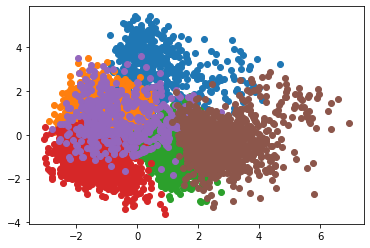

In [10]:
pca_df = pca(cluster_data,cluster_df,3).add_prefix('pca_')

In [11]:
pca_df.head()

,pca_0,pca_1,pca_2,pca_cluster
0,-0.261937,5.044936,2.521302,5
1,-1.661705,0.255611,-1.272544,0
2,1.268983,0.030598,0.715309,4
3,-1.407780,1.502747,-0.809620,0
4,-1.798215,-1.600899,0.474826,1


In [8]:
#クラスター最適化(エルボー)

def elbow_method(origin_data):
    sc = StandardScaler()
    cluster_sc = sc.fit_transform(origin_data)
    X = cluster_sc
    
    list = []
    
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i,init='random',random_state=2021)
        kmeans.fit(X)
        list.append(kmeans.inertia_)
        
    plt.plot(range(1,10),list,marker='+')
    plt.xlabel('NumberOfCluster')

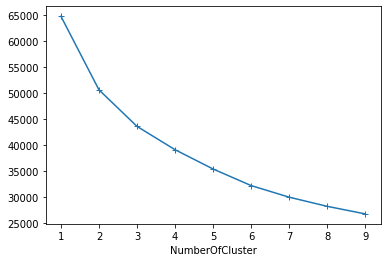

In [9]:
elbow_method(cluster_data)

In [14]:
cluster_dummy = pd.get_dummies(cluster_df['cluster'],drop_first=False).add_prefix('cluster_')
cluster_dummy.head()

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [15]:
cluster_data = pd.concat([pca_df,cluster_dummy],axis=1)
cluster_data.head()

,pca_0,pca_1,pca_2,pca_cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,-0.261937,5.044936,2.521302,5,0,0,0,0,0,1
1,-1.661705,0.255611,-1.272544,0,1,0,0,0,0,0
2,1.268983,0.030598,0.715309,4,0,0,0,0,1,0
3,-1.407780,1.502747,-0.809620,0,1,0,0,0,0,0
4,-1.798215,-1.600899,0.474826,1,0,1,0,0,0,0


In [16]:
cluster_data.to_csv(input / 'cluster_data.csv',index=False)

In [17]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pca_0        8092 non-null   float64
 1   pca_1        8092 non-null   float64
 2   pca_2        8092 non-null   float64
 3   pca_cluster  8092 non-null   int32  
 4   cluster_0    8092 non-null   uint8  
 5   cluster_1    8092 non-null   uint8  
 6   cluster_2    8092 non-null   uint8  
 7   cluster_3    8092 non-null   uint8  
 8   cluster_4    8092 non-null   uint8  
 9   cluster_5    8092 non-null   uint8  
dtypes: float64(3), int32(1), uint8(6)
memory usage: 268.8 KB


In [27]:
input = Path('input')

df = pd.read_csv(input / 'features_data.csv')
df.head()

,region_A,region_B,region_C,region_D,region_E,region_F,region_G,region_H,region_I,region_J,...,standardscaled_instrumentalness,standardscaled_log_tempo,factor_1,factor_2,factor_3,music_nature,nature_factor,exciting_factor,language_factor,song_factor
0,0,0,0,0,0,0,0,1,0,0,...,4.338655,0.544048,-1.420504,2.259227,-0.021925,5.742936,1.907340,0.985881,2.849715,5.768700
1,0,0,0,0,0,0,0,0,1,0,...,-0.588519,1.248860,-1.265113,0.284038,0.253307,-0.863710,0.857923,-0.795320,-0.926314,-0.062652
2,0,0,0,0,1,0,0,0,0,0,...,-0.314395,-1.978618,0.808452,0.326082,-0.240502,-0.393039,-0.566170,-1.492048,1.665179,-0.704443
3,0,0,1,0,0,0,0,0,0,0,...,-0.256881,1.682276,-1.235781,1.103026,0.207864,0.068024,1.212081,-2.156487,1.012429,0.382009
4,0,0,0,0,0,0,0,0,0,0,...,0.069233,-0.323149,-0.324308,-1.586230,-0.732366,3.675958,0.513928,3.527748,-0.365718,0.993303


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster(cluster_data,n_cluster):
    
    kmeans = KMeans(n_clusters=n_cluster,random_state=2021)
    clusters = kmeans.fit(cluster_data)
    cluster_data['cluster'] = clusters.labels_
    return cluster_data

In [29]:
features = ['standardscaled_acousticness', 'standardscaled_positiveness',
   'standardscaled_danceability', 'standardscaled_loudness',
   'standardscaled_energy', 'standardscaled_liveness',
   'standardscaled_speechiness', 'standardscaled_instrumentalness']

cluster_data = df[features]

cluster_df = clustering(cluster_data,6)
cluster_df.head()

C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,standardscaled_acousticness,standardscaled_positiveness,standardscaled_danceability,standardscaled_loudness,standardscaled_energy,standardscaled_liveness,standardscaled_speechiness,standardscaled_instrumentalness,cluster
0,-0.955367,-1.387603,-1.965171,1.430045,1.432662,0.614918,2.234797,4.338655,5
1,-1.003456,-0.536710,0.329910,0.525867,1.335512,-0.470650,-0.455665,-0.588519,0
2,0.651855,-0.901545,-0.276109,-0.390048,-0.827977,-0.321872,1.987051,-0.314395,4
3,-0.733915,-0.990798,-0.908808,0.638890,1.307106,0.701010,0.311420,-0.256881,0
4,-0.628947,1.400512,2.058003,0.924070,0.218805,-0.627839,0.262121,0.069233,1


In [32]:
def elbow_method(origin_data):
    
    list = []
    
    for i in range(1,10):
        kmeans = KMeans(n_clusters=i,init='random',random_state=2021)
        kmeans.fit(cluster_data)
        list.append(kmeans.inertia_)
        
    plt.plot(range(1,10),list,marker='+')
    plt.xlabel('NumberOfCluster')

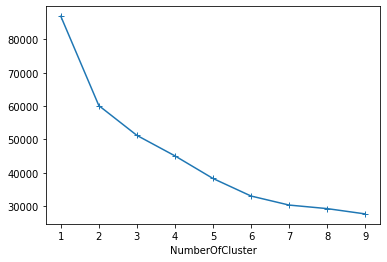

In [33]:
elbow_method(cluster_data)

In [12]:
clustering = clustering(cluster_data,3)
clustering.head()

,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,cluster
0,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,0
1,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,0
2,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,1
3,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,0
4,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,0


In [14]:
df['cluster'] = clustering['cluster']
df.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region,cluster
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H,0
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I,0
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E,1
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C,0
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown,0


In [39]:
input = Path('input')
df.to_csv(input / "features_data.csv",index=False)

In [16]:
df.groupby('cluster')['genre'].count()

cluster
0    3655
1    3484
2     953
Name: genre, dtype: int64

In [17]:
train_df = pd.read_csv(input / 'train.csv')
train_len = len(train_df)
train = df[:train_len]

<AxesSubplot:xlabel='cluster'>

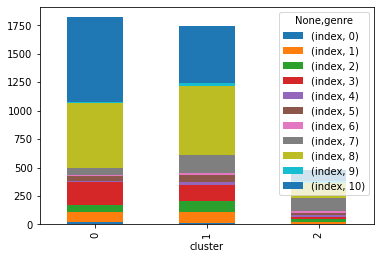

In [20]:
cluster_df = train[['genre','cluster','index']].dropna().groupby(['cluster','genre']).count().unstack()
cluster_df.plot.bar(stacked=True)